# ICA 1

Given the paired observations:
```python
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 3.5, 4, 5, 4.5, 6])
```
1. Find an $a_1, a_0$ (slope, intercept) which get close to the minimum MSE (guess and check via `show_fit()`)
1. Compute the MSE of the line $a_1 = 0, a_0 =$ `np.mean(y)` by hand
1. Verify your answer using `show_fit()`
1. This computation feels oddly familiar ... can you identify where we've seen it before?

Use the `show_fit()` function to try and find $a_1, a_0$ which  MSE is the smallest in the following dataset:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import numpy as np

def get_mse(y_true, y_pred):
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_pred - y_true) ** 2)

def show_fit(x, y, slope, intercept):
    plt.figure()
    
    # transform the input data into numpy arrays and flatten them for easier processing
    x = np.array(x).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='data')
    
    # compute linear predictions 
    # x is a numpy array so each element gets mulitplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='linear fit')
    
    # for each data point plot the error
    for idx, (x_i, y_i) in enumerate(zip(x, y)):
        plt.plot([x_i, x_i], [y_i, slope * x_i + intercept], 
                 ls='--', lw=3, color='tab:red',
                 label='error' if idx == 0 else "")
    
    plt.legend()
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    # print the mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    plt.suptitle(f'y_hat = {slope:.2f} * x + {intercept:.2f}, MSE = {mse:.3f}')
 

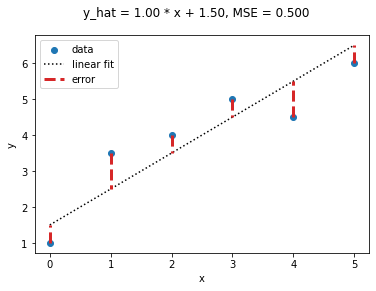

In [9]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 3.5, 4, 5, 4.5, 6])

# finding best slope and intercept
show_fit(x, y, 1, 1.5)

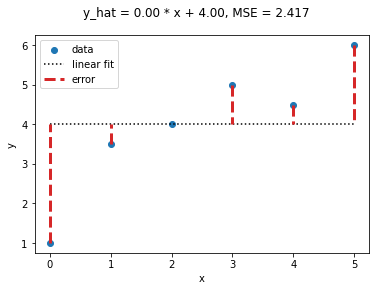

In [10]:
# computing and verifying MSE
show_fit(x, y, slope=0, intercept=np.mean(y))

In [11]:
y_pred = x * 0 + np.mean(y)
error = y_pred - y
error

array([ 3. ,  0.5,  0. , -1. , -0.5, -2. ])

In [12]:
error_sq = error ** 2
mse = np.mean(error_sq)
mse

2.4166666666666665

# In Class Assignment 2

Predict y=`trip_count` from x=`temp` by ...
1. `.fit()`ing a LinearRegression to predict y from x
1. visually inspect your results using `show_fit()`
1. print the following values to describe your prediction
    - slope 
    - intercept
    - mse
    - r2
1. Repeat the three steps above for each new x value below.  (Use a loop)
    - x=`wind`
    - x=`rain`
1. (if time) Predict `trip_count_wheels`, the number of wheels which have been taken on a trip via `wind`:
    - how to get `trip_count_wheels`:
        - trip_count_wheels = trip_count * 2
    - model:
        - trip_count_wheels = a_0 + a_1 * wind
    - how does the MSE and R^2 values of this model change from:
        - model: trip_count = a_0 + a_1 * wind
    
Using the results above, answer the following questions
1. Which of the three features, `temp`, `wind` or `rain` best predicts changes in `trip_count`?  
1. Explain, to a non-technical expert, the meaning of the slope used in the line of best fit of the feature which best predicts changes in `trip_count` (answer above)

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df_bike = pd.read_csv('bluebike_201910.csv')

df_bike.head()

,date,trip_count,temp,wind,rain
0,2019-10-01,12183,69,13,0
1,2019-10-02,9071,66,11,1
2,2019-10-03,11496,54,9,0
3,2019-10-04,11767,60,16,0
4,2019-10-05,9315,56,9,0


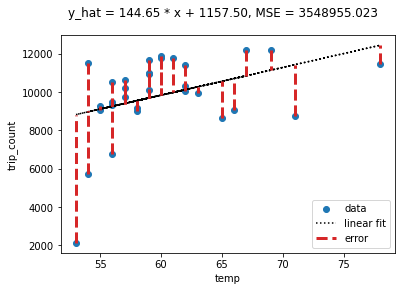

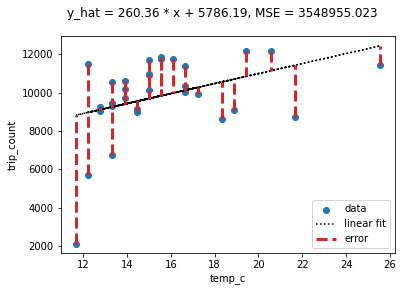

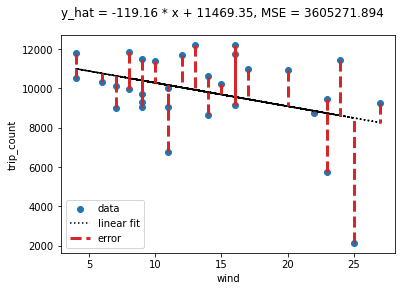

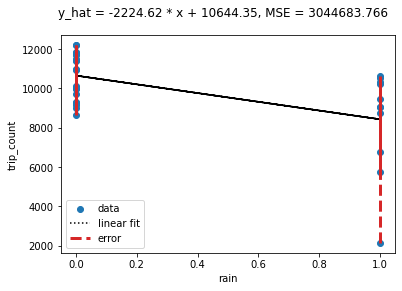

In [16]:
# F to C
df_bike['temp_c'] = (df_bike['temp'] - 32) / 1.8

# empty table of regression stats
df_regress = pd.DataFrame()

# regression object
reg = LinearRegression()

# target variable
y = df_bike['trip_count'].values

for feature in ['temp', 'temp_c', 'wind', 'rain']:
    # x feat
    x = df_bike.loc[:, feature].values.reshape(-1, 1)
    
    # fit regression
    reg.fit(x, y)
    
    # observing regression
    m = reg.coef_[0]
    b = reg.intercept_
    show_fit(x, y, slope=m, intercept=b)
    plt.xlabel(feature)
    plt.ylabel('trip_count')
    
    # make predictions given model
    y_pred = reg.predict(x)
    
    # store regression stats
    df_regress.loc[feature, 'r2'] = r2_score(y_true=y, y_pred=y_pred)
    df_regress.loc[feature, 'mse'] = get_mse(y_pred, y)
    df_regress.loc[feature, 'slope'] = reg.coef_[0]
    df_regress.loc[feature, 'intercept'] = reg.intercept_
    